# Analysis of number of connections per certificate per day

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import math
%matplotlib inline

In [2]:
no_v_rtts = np.loadtxt("1_connections_per_certificate_per_day.sh.csv.countonly", delimiter=",")
no_v_rtts_sort = np.sort(no_v_rtts)

ios = np.loadtxt("1_connections_per_certificate_per_day_ios.sh.csv.countonly", delimiter=",")
ios_sort = np.sort(ios)

macos = np.loadtxt("1_connections_per_certificate_per_day_macos.sh.csv.countonly", delimiter=",")
macos_sort = np.sort(macos)

print(no_v_rtts_sort,ios_sort,macos_sort)

[  1.   1.   1. ...,  18.  18.  18.] [  1.   1.   1. ...,  18.  18.  18.] [  1.   1.   1. ...,  18.  18.  18.]


## Plot definitions

In [3]:
ylabel = "% of certificates seen on $\leq$ n days"
xlabel = "# of days"
xmin = 0
ymin = 0
path = "./"

## CDF: No verification RTT

In [4]:
print(len(no_v_rtts_sort))
j=1
for i in range(0,len(no_v_rtts_sort)):
    if no_v_rtts_sort[i] > j:
        print(j,i,1-i/len(no_v_rtts_sort))
        j=j+1
        if(j>5):
            break

56128
1 18802 0.6650156784492589
2 27330 0.513077251995439
3 32284 0.42481470923603193
4 36082 0.3571479475484607
5 39030 0.30462514253135686


In [5]:
print(len(macos_sort))
j=1
for i in range(0,len(macos_sort)):
    if macos_sort[i] > j:
        print(j,i,1-i/len(macos_sort))
        j=j+1
        if(j>5):
            break

15815
1 4807 0.6960480556433766
2 7028 0.5556117609864053
3 8435 0.46664558963009806
4 9502 0.3991779955738223
5 10383 0.34347138792285803


In [6]:
print(len(ios_sort))
j=1
for i in range(0,len(ios_sort)):
    if ios_sort[i] > j:
        print(j,i,1-i/len(ios_sort))
        j=j+1
        if(j>5):
            break

40313
1 13995 0.6528415151439982
2 20302 0.4963907424404038
3 23849 0.4084042368466748
4 26580 0.34065934065934067
5 28647 0.2893855580085828


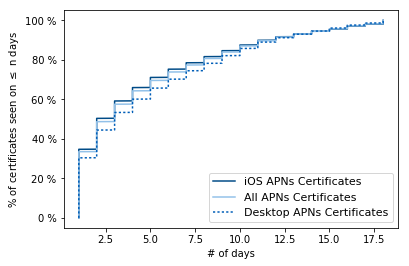

In [8]:
# TODO: Use these colors for lines
TUMDarkerBlue="#004b87"
TUMLighterBlue="#92c1e9"
TUMBlue="#005eb8"
TUMOrange="##e87722"

# CDF:
yvals_ios= np.arange(len(ios_sort))/float(len(ios_sort))*100
# CCDF:
#yvals = (float(len(no_v_rtts_sort))-np.arange(len(no_v_rtts_sort)))/float(len(no_v_rtts_sort))*100
plt.plot(ios_sort, yvals_ios, label="iOS APNs Certificates",color=TUMDarkerBlue,linestyle="-")

# CDF:
yvals= np.arange(len(no_v_rtts_sort))/float(len(no_v_rtts_sort))*100
# CCDF:
#yvals = (float(len(no_v_rtts_sort))-np.arange(len(no_v_rtts_sort)))/float(len(no_v_rtts_sort))*100
plt.plot(no_v_rtts_sort, yvals, label="All APNs Certificates",color=TUMLighterBlue)

# CDF:
yvals_macos= np.arange(len(macos_sort))/float(len(macos_sort))*100
# CCDF:
#yvals = (float(len(no_v_rtts_sort))-np.arange(len(no_v_rtts_sort)))/float(len(no_v_rtts_sort))*100
plt.plot(macos_sort, yvals_macos, label="Desktop APNs Certificates",color=TUMBlue,linestyle=":")



plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%d %%'))
#plt.xscale("log")
plt.ylabel(ylabel)
plt.xlabel(xlabel)
plt.legend(loc='lower right',prop={'size':11})
idx=28158 # value for 17 days
#plt.axvline(no_v_rtts_sort[idx], ymax=idx/len(no_v_rtts_sort), linestyle='--', color='k') # vertical lines
#plt.gcf().subplots_adjust(bottom=0.125,right=0.97,left=0.1,top=0.97)
plt.savefig('connspercert_per_day.pdf', format='pdf', dpi=2000)    
plt.show()

In [9]:
%%bash
pdfcrop connspercert_per_day.pdf
rm connspercert_per_day.pdf

PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `connspercert_per_day-crop.pdf'.
